# Library

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.fft import fft2, ifft2
from skimage import io, color
from scipy.ndimage import gaussian_filter

In [23]:
# Memuat citra dari path
image_path = "/content/avatar.png"
input_image = io.imread(image_path)
gray_input_image = color.rgb2gray(input_image)



# DFT & FFT


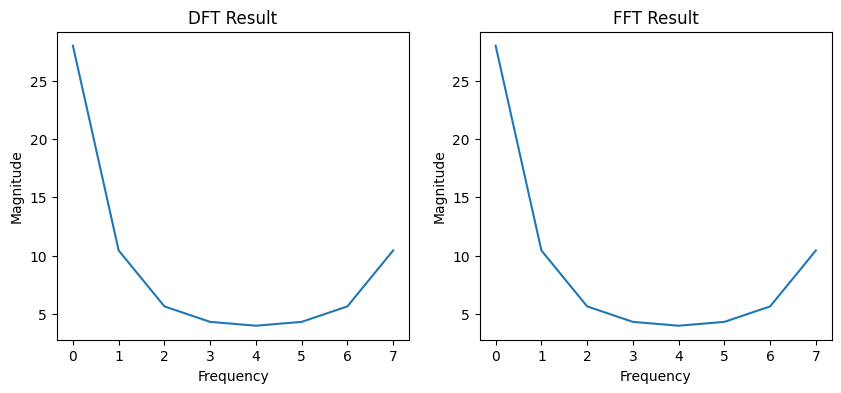

In [24]:
# Fungsi untuk menghitung DFT
def calculate_dft(signal):
    N = len(signal)
    dft_signal = np.zeros(N, dtype=complex)

    for k in range(N):
        dft_signal[k] = sum(signal[n] * np.exp(-2j * np.pi * k * n / N) for n in range(N))

    return dft_signal

# Fungsi untuk menghitung FFT
def calculate_fft(signal):
    return fft(signal)

# Data sinyal untuk diuji
signal = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Perhitungan DFT dan FFT
dft_result = calculate_dft(signal)
fft_result = calculate_fft(signal)

# Plot hasil perhitungan DFT
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.abs(dft_result))
plt.title('DFT Result')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Plot hasil perhitungan FFT
plt.subplot(1, 2, 2)
plt.plot(np.abs(fft_result))
plt.title('FFT Result')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

# Ideal Lowpass Filter & Butterworth Lowpass Filter

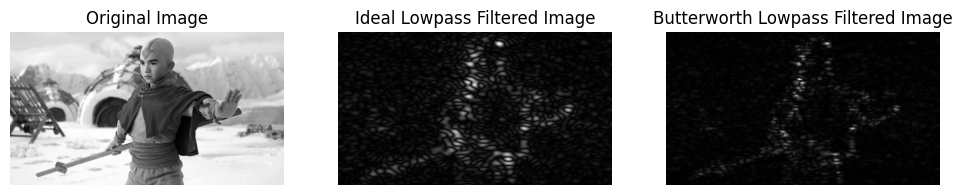

In [25]:
# Fungsi untuk menghitung DFT 2D
def calculate_dft2d(image):
    return fft2(image)

# Fungsi untuk membuat filter lowpass ideal
def ideal_lowpass_filter(image, cutoff_freq):
    dft_img = calculate_dft2d(image)
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance > cutoff_freq:
                dft_img[i, j] = 0

    return np.abs(ifft2(dft_img))

# Fungsi untuk membuat filter lowpass Butterworth
def butterworth_lowpass_filter(image, cutoff_freq, n):
    dft_img = calculate_dft2d(image)
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            dft_img[i, j] *= 1 / (1 + (distance / cutoff_freq)**(2*n))

    return np.abs(ifft2(dft_img))

# Kontrol filter
cutoff_freq = 30
n = 2

# Filter
ideal_lowpass_filtered_image = ideal_lowpass_filter(gray_input_image, cutoff_freq)
butterworth_lowpass_filtered_image = butterworth_lowpass_filter(gray_input_image, cutoff_freq, n)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(ideal_lowpass_filtered_image, cmap='gray')
plt.title('Ideal Lowpass Filtered Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(butterworth_lowpass_filtered_image, cmap='gray')
plt.title('Butterworth Lowpass Filtered Image')
plt.axis('off')
plt.show()


# Gaussian Lowpass Filter & Ideal Highpass Filter

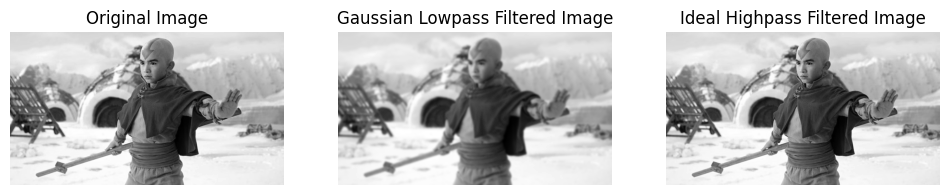

In [26]:
# Fungsi untuk menghitung DFT 2D
def calculate_dft2d(image):
    return fft2(image)

# Fungsi untuk membuat filter lowpass Gaussian
def gaussian_lowpass_filter(image, sigma):
    return gaussian_filter(image, sigma)

# Fungsi untuk membuat filter highpass ideal
def ideal_highpass_filter(image, cutoff_freq):
    dft_img = calculate_dft2d(image)
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_freq:
                dft_img[i, j] = 0

    return np.abs(ifft2(dft_img))



# Kontrol filter
sigma = 2
cutoff_freq = 30

# Filter
gaussian_lowpass_filtered_image = gaussian_lowpass_filter(gray_input_image, sigma)
ideal_highpass_filtered_image = ideal_highpass_filter(gray_input_image, cutoff_freq)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gaussian_lowpass_filtered_image, cmap='gray')
plt.title('Gaussian Lowpass Filtered Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(ideal_highpass_filtered_image, cmap='gray')
plt.title('Ideal Highpass Filtered Image')
plt.axis('off')
plt.show()


# Butterworth Highpass Filter & Gaussian Highpass Filter

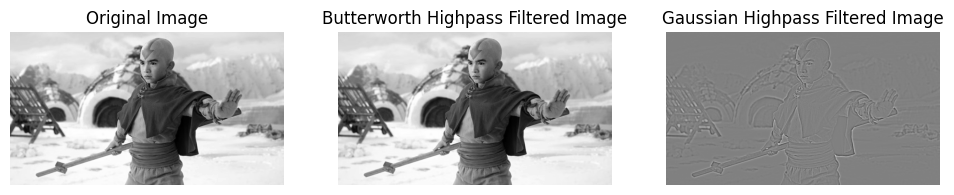

In [27]:

# Fungsi untuk menghitung DFT 2D
def calculate_dft2d(image):
    return fft2(image)

# Fungsi untuk membuat filter highpass Butterworth
def butterworth_highpass_filter(image, cutoff_freq, n):
    dft_img = calculate_dft2d(image)
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance != 0:
                dft_img[i, j] *= 1 / (1 + (cutoff_freq / distance)**(2*n))

    return np.abs(ifft2(dft_img))

# Fungsi untuk membuat filter highpass Gaussian
def gaussian_highpass_filter(image, sigma):
    return image - gaussian_filter(image, sigma)

# Kontrol filter
sigma = 2
cutoff_freq = 30
n = 2

# Filter
butterworth_highpass_filtered_image = butterworth_highpass_filter(gray_input_image, cutoff_freq, n)
gaussian_highpass_filtered_image = gaussian_highpass_filter(gray_input_image, sigma)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(butterworth_highpass_filtered_image, cmap='gray')
plt.title('Butterworth Highpass Filtered Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gaussian_highpass_filtered_image, cmap='gray')
plt.title('Gaussian Highpass Filtered Image')
plt.axis('off')
plt.show()


# Filter Unsharp Masking & Filter Laplacian Domain Frekuensi & Selective Filtering

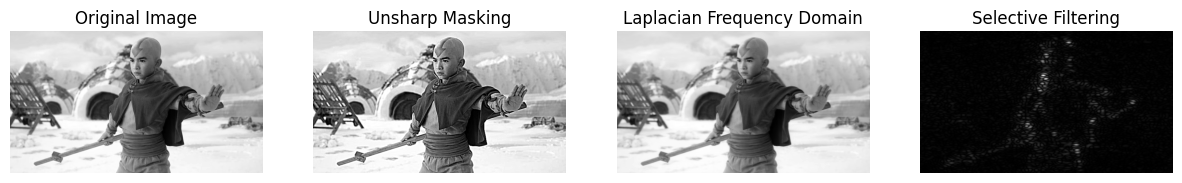

In [28]:
# Fungsi untuk menghitung DFT 2D
def calculate_dft2d(image):
    return fft2(image)

# Fungsi untuk membuat filter Unsharp Masking
def unsharp_masking(image, sigma, alpha):
    blurred = gaussian_filter(image, sigma)
    high_pass = image - blurred
    sharpened = image + alpha * high_pass
    return np.clip(sharpened, 0, 1)

# Fungsi untuk membuat filter Laplacian Domain Frekuensi
def laplacian_frequency_domain(image):
    dft_img = calculate_dft2d(image)
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            dft_img[i, j] *= -4 * np.pi**2 * distance**2

    return np.abs(ifft2(dft_img))

# Fungsi untuk melakukan Selective Filtering
def selective_filtering(image, radius):
    dft_img = calculate_dft2d(image)
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance > radius:
                dft_img[i, j] = 0

    return np.abs(ifft2(dft_img))

# Kontrol filter
sigma = 2
alpha = 1.5
radius = 50

# Filter
unsharp_masking_filtered_image = unsharp_masking(gray_input_image, sigma, alpha)
laplacian_frequency_domain_filtered_image = laplacian_frequency_domain(gray_input_image)
selective_filtering_image = selective_filtering(gray_input_image, radius)

# Visualisasi
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(gray_input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(unsharp_masking_filtered_image, cmap='gray')
plt.title('Unsharp Masking')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(laplacian_frequency_domain_filtered_image, cmap='gray')
plt.title('Laplacian Frequency Domain')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(selective_filtering_image, cmap='gray')
plt.title('Selective Filtering')
plt.axis('off')
plt.show()
